In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transactions-data-2/bank_transactions_data_2.csv


# importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/bank-transactions-data-2/bank_transactions_data_2.csv")

In [4]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
df.shape

(2512, 16)

# checking Missing values 
## Why We Check for Missing Values
- Missing values can affect clustering performance by distorting distances  
between samples. 
- Before any modeling, we inspect the dataset for null values  
to decide whether we should impute them, drop them, or engineer around them.


In [6]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [7]:
print("Unique Accounts: ",df['AccountID'].nunique())
print("Unique Devices: ",df['DeviceID'].nunique())
print("IP Address: ",df['IP Address'].nunique())
print("MerchantID: ",df['MerchantID'].nunique())

Unique Accounts:  495
Unique Devices:  681
IP Address:  592
MerchantID:  100


In [8]:
df.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [9]:
#convert dates
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate']=pd.to_datetime(df['PreviousTransactionDate'])

In [10]:
df.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [11]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# Exploratory Data Analysis (EDA)


# Univariate Analysis: Distributions


Understanding the distribution of each feature helps identify:
- outliers  
- skewed variables  
- unusual transaction patterns  
- features that may need scaling or transformation  

This is especially important for unsupervised algorithms  
that rely heavily on distance calculations.

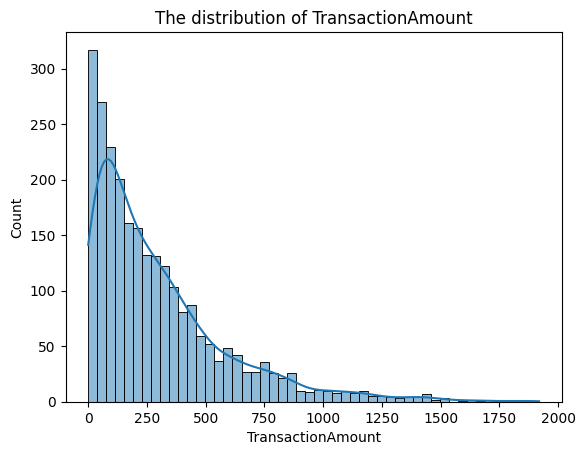

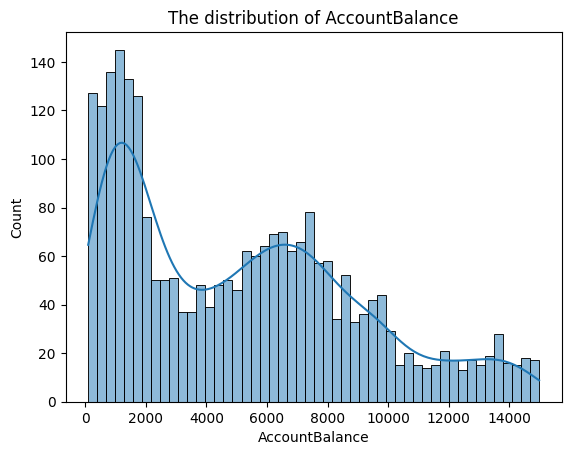

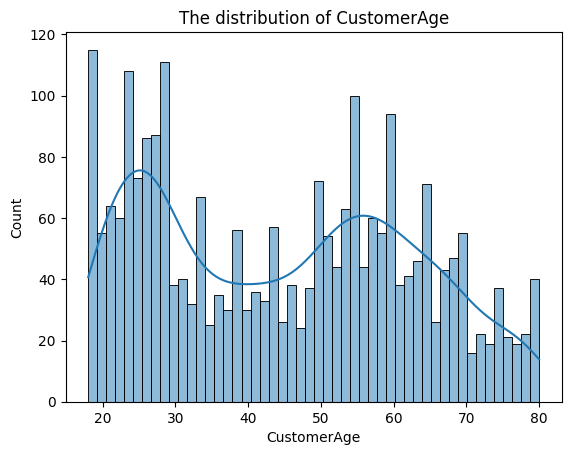

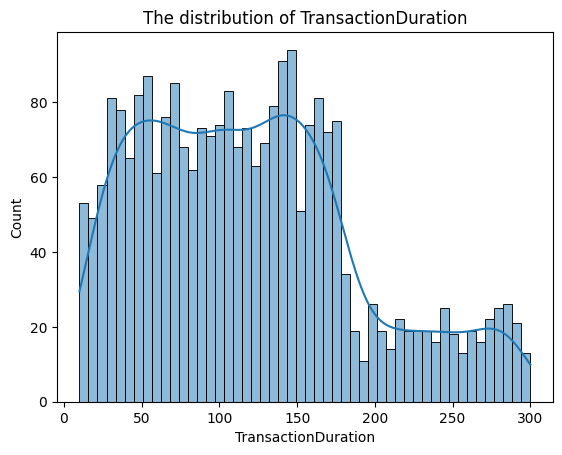

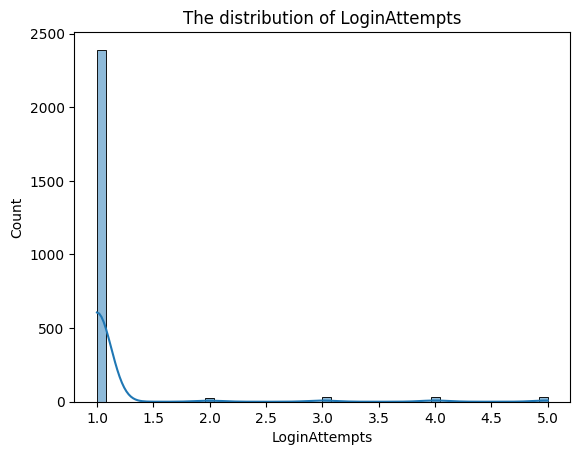

In [12]:
numerical_features=['TransactionAmount', 'AccountBalance', 'CustomerAge', 
                'TransactionDuration', 'LoginAttempts']

for col in numerical_features:
    sns.histplot(df[col],bins=50,kde=True)
    plt.title(f'The distribution of {col}')
    plt.show()

# Categorical Feature Exploration

Fraud can often be linked to unusual categories (e.g., device type, login location).  
By studying categorical variables, we identify patterns or rare combinations  
that may indicate suspicious behavior.

In [13]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

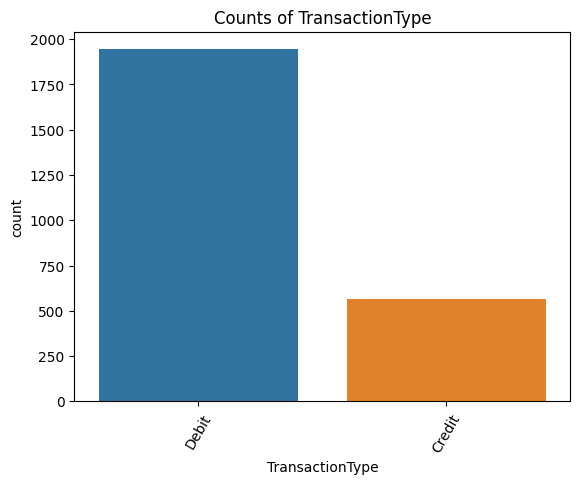

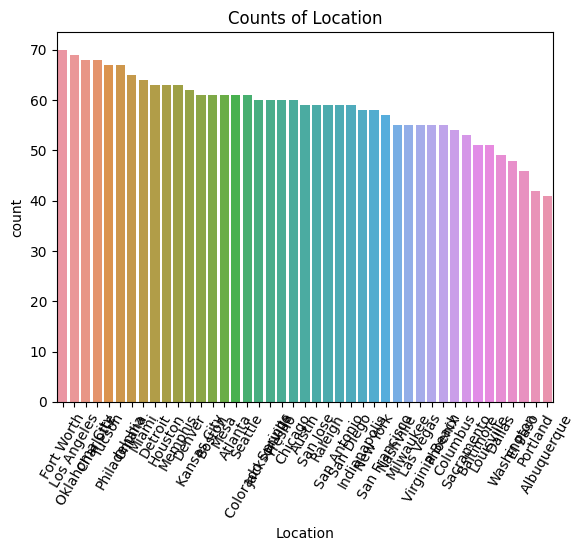

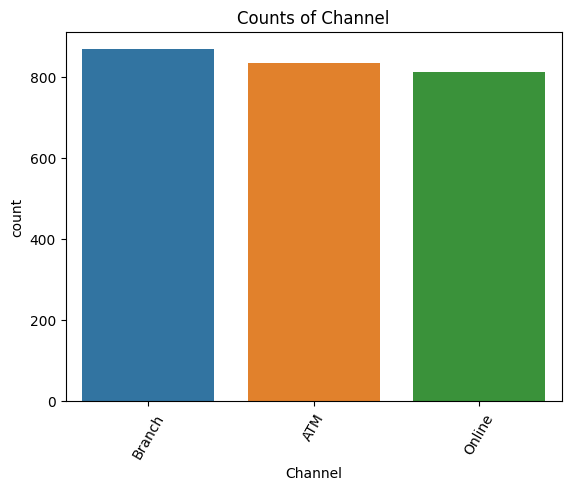

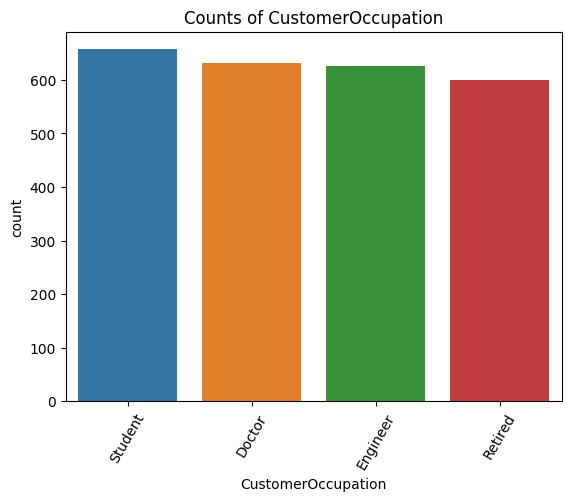

In [14]:
categorical_Features=['TransactionType','Location','Channel','CustomerOccupation']

for col in categorical_Features:
    sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=60)
    plt.show()

# Correlation and Pairwise Analysis
Correlation analysis reveals how features move together.  
Highly correlated features may not add new information,  
while weak correlations can signal independent behavior.  
This helps decide which features are useful when clustering.

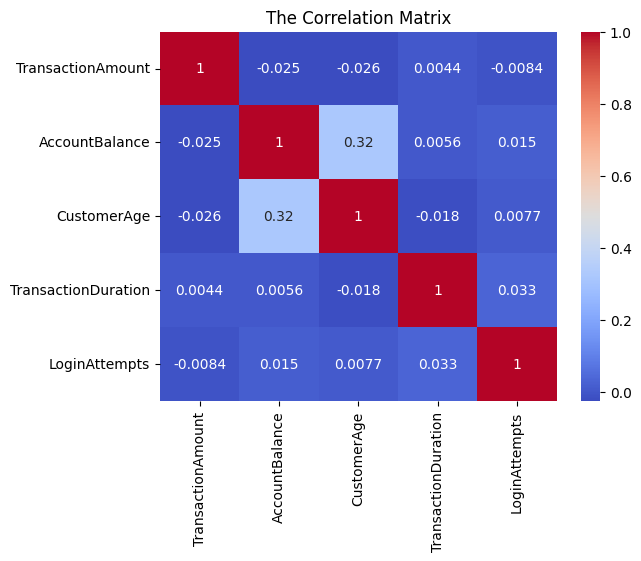

In [15]:
corr=df[numerical_features].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("The Correlation Matrix")
plt.show()

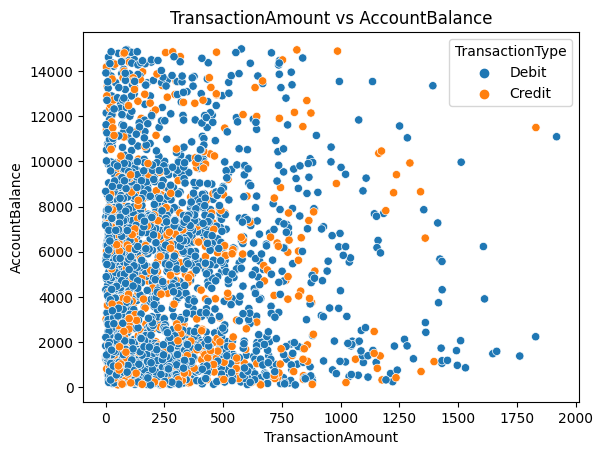

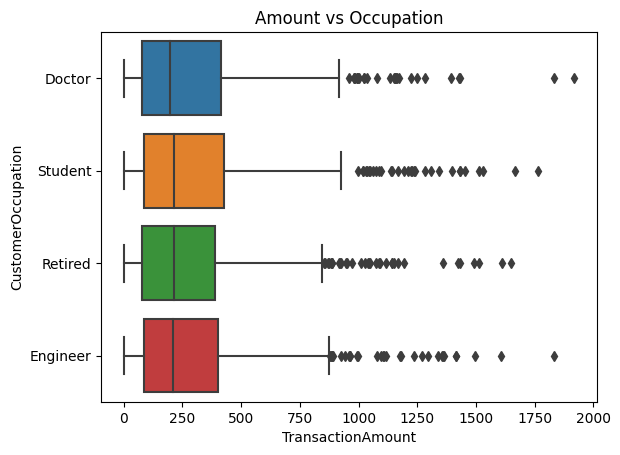

In [16]:
# amount vs balance 
sns.scatterplot(data=df,x='TransactionAmount',y='AccountBalance',hue='TransactionType')
plt.title('TransactionAmount vs AccountBalance')
plt.show()

# Amount vs Occupation
sns.boxplot(data=df,x='TransactionAmount',y='CustomerOccupation')
plt.title("Amount vs Occupation")
plt.show()

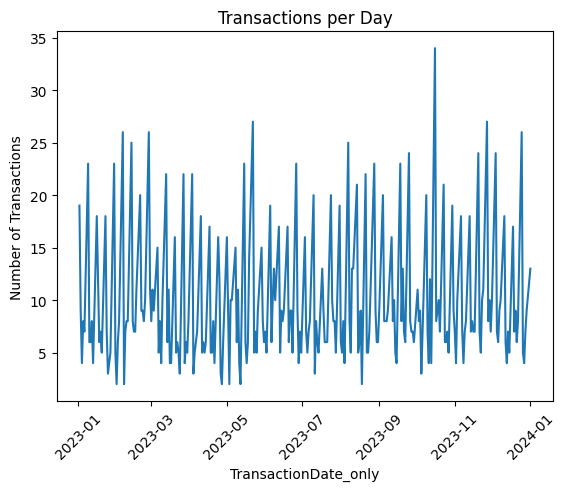

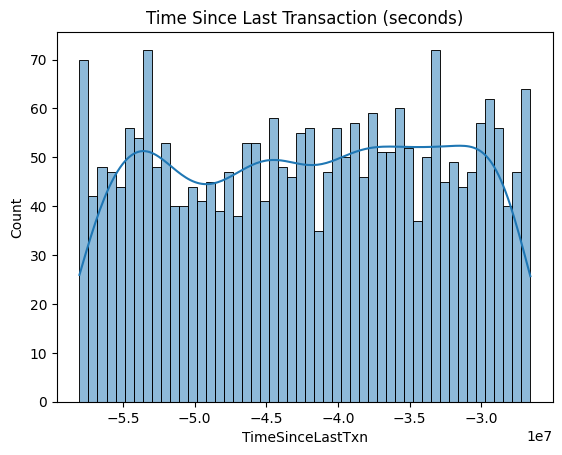

In [17]:
df['TransactionDate_only'] = df['TransactionDate'].dt.date

# Daily transaction volume
df.groupby('TransactionDate_only').size().plot(title='Transactions per Day')
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Time since last transaction
df['TimeSinceLastTxn'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
sns.histplot(df['TimeSinceLastTxn'].dropna(), bins=50, kde=True)
plt.title("Time Since Last Transaction (seconds)")
plt.show()

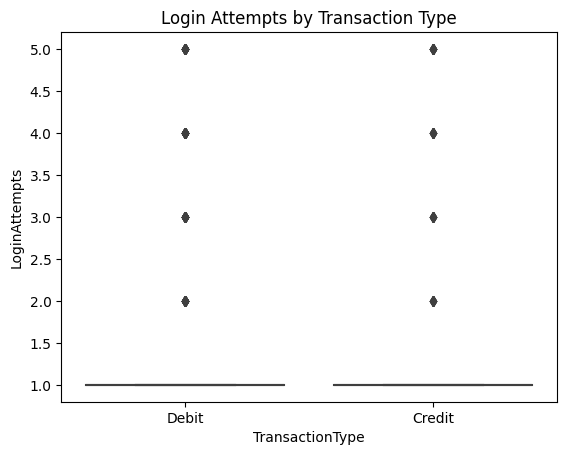

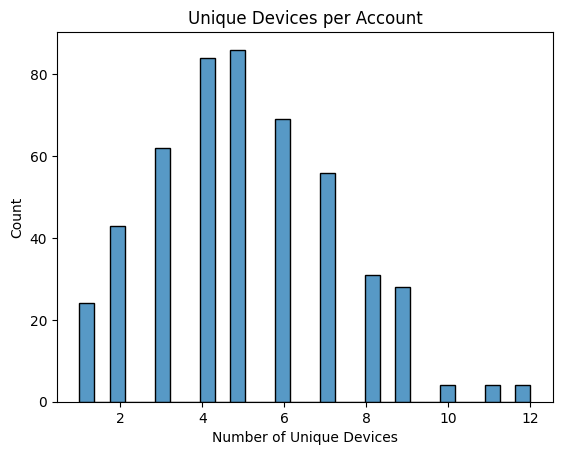

In [18]:
sns.boxplot(data=df, x='TransactionType', y='LoginAttempts')
plt.title("Login Attempts by Transaction Type")
plt.show()

# Devices per Account
device_counts = df.groupby('AccountID')['DeviceID'].nunique()
sns.histplot(device_counts, bins=30)
plt.title("Unique Devices per Account")
plt.xlabel("Number of Unique Devices")
plt.show()

In [19]:
# Preferred Merchant per Account
merchant_freq = df.groupby('AccountID')['MerchantID'].value_counts().groupby('AccountID').head(1)
print("Most used Merchant per Account:")
print(merchant_freq.head())

# Unusual merchants
df['MerchantUseCount'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')
unusual_merchants = df[df['MerchantUseCount'] == 1]
print("Unusual Merchant Usage Examples:")
print(unusual_merchants[['AccountID', 'MerchantID', 'TransactionDate']].head())

Most used Merchant per Account:
AccountID  MerchantID
AC00001    M003          1
AC00002    M040          2
AC00003    M032          1
AC00004    M011          1
AC00005    M002          1
Name: count, dtype: int64
Unusual Merchant Usage Examples:
  AccountID MerchantID     TransactionDate
0   AC00128       M015 2023-04-11 16:29:14
1   AC00455       M052 2023-06-27 16:44:19
2   AC00019       M009 2023-07-10 18:16:08
3   AC00070       M002 2023-05-05 16:32:11
4   AC00411       M091 2023-10-16 17:51:24


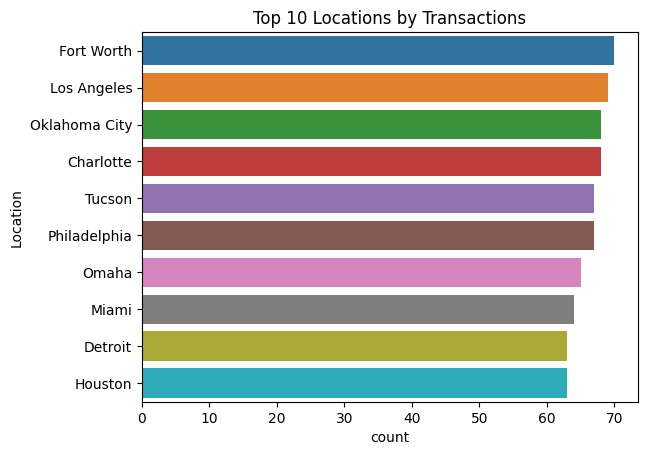

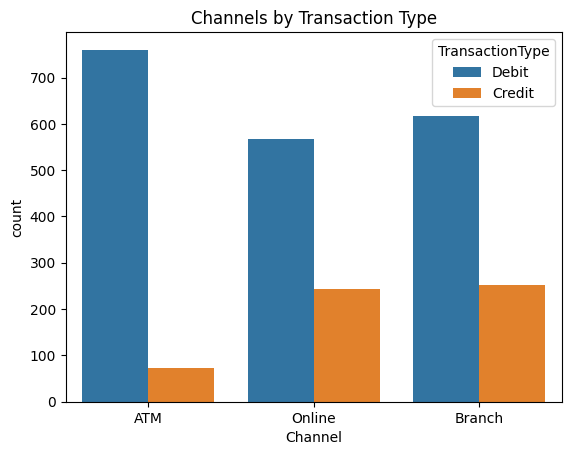

In [20]:
# Location counts
sns.countplot(y=df['Location'], order=df['Location'].value_counts().head(10).index)
plt.title("Top 10 Locations by Transactions")
plt.show()

# Channel vs TransactionType
sns.countplot(data=df, x='Channel', hue='TransactionType')
plt.title("Channels by Transaction Type")
plt.show()

In [21]:
# Time-based behavior
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['IsNightTransaction'] = df['TransactionHour'].apply(lambda x: 1 if x < 6 else 0)

# Ratio features
df['AmountToBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-5)

In [22]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionDate_only,TimeSinceLastTxn,MerchantUseCount,TransactionHour,IsNightTransaction,AmountToBalanceRatio
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,2023-04-11,-49477134.0,1,16,0,0.002756
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,2023-06-27,-42823516.0,1,16,0,0.027345
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,2023-07-10,-41694656.0,1,18,0,0.112523
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,2023-05-05,-47403415.0,1,16,0,0.021531
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,198,1,7429.40,2024-11-04 08:06:39,2023-10-16,-33228915.0,1,17,0,0.001810


# Advanced Feature Engineering 

**Velocity Features (Frequency-based)**

raw data rarely captures the full behavior of users or transactions.  
Feature engineering helps transform raw logs into meaningful behavioral signals.  
These engineered features often reveal hidden fraud patterns more clearly  
than the original dataset.

**TxnsLast1H** : Number of transactions for the same account in the last 1 hour.

**TxnGapSeconds**: Time difference from the previous transaction (already created).





In [23]:
df=df.sort_values(['AccountID','TransactionDate'])

df['TxnGapSeconds']=(df['TransactionDate']-df['PreviousTransactionDate']).dt.total_seconds()

# Number of transactions in the last 1 hour 
df.set_index('TransactionDate', inplace=True) #Because rolling windows with time (like '1h') only work if the DataFrame has a datetime-based index.


df['TxnsLast1H'] = df.groupby('AccountID')['AccountID'].rolling('1h').count().reset_index(level=0, drop=True)


In [24]:
df.shape

(2512, 23)

# Amount-Based Features


-Fraud often involves transaction amounts that are high compared to the user's usual behavior.

-Fraudsters often manipulate transaction amounts — either very small to avoid detection  
or unusually large.  
Creating statistical and behavioral features around amounts helps expose these patterns.


In [25]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionDate_only', 'TimeSinceLastTxn', 'MerchantUseCount',
       'TransactionHour', 'IsNightTransaction', 'AmountToBalanceRatio',
       'TxnGapSeconds', 'TxnsLast1H'],
      dtype='object')

In [26]:
df['AmountToBalanceRatio']=df['TransactionAmount']/(df['AccountBalance']+1e-5)

user_avg=df.groupby(['AccountID'])['TransactionAmount'].transform("mean")
df['DeviationFromAvgAmount']=df['TransactionAmount']-user_avg

# Flag unusually large transaction
user_95th=df.groupby(['AccountID'])['TransactionAmount'].transform(lambda x: np.percentile(x,95))
df['IsLargeTxn']=(df['TransactionAmount']>user_95th).astype(int)

In [27]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionDate_only', 'TimeSinceLastTxn', 'MerchantUseCount',
       'TransactionHour', 'IsNightTransaction', 'AmountToBalanceRatio',
       'TxnGapSeconds', 'TxnsLast1H', 'DeviationFromAvgAmount', 'IsLargeTxn'],
      dtype='object')

In [28]:
df.head(20)

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,...,TransactionDate_only,TimeSinceLastTxn,MerchantUseCount,TransactionHour,IsNightTransaction,AmountToBalanceRatio,TxnGapSeconds,TxnsLast1H,DeviationFromAvgAmount,IsLargeTxn
TransactionDate,,,,,,,,,,,,,,,,,,,,,
2023-09-15 17:00:20,TX001313,AC00001,47.79,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,...,2023-09-15,-35910695.0,1,17,0,0.028965,-35910695.0,1.0,-82.590000,0
2023-11-14 16:56:34,TX002017,AC00001,212.97,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,...,2023-11-14,-30726848.0,1,16,0,0.050945,-30726848.0,1.0,82.590000,1
2023-01-10 16:00:32,TX002121,AC00002,476.99,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,...,2023-01-10,-57341378.0,1,16,0,0.413164,-57341378.0,1.0,183.245714,0
2023-02-28 16:36:58,TX000021,AC00002,59.32,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,...,2023-02-28,-53105546.0,2,16,0,0.010315,-53105546.0,1.0,-234.424286,0
2023-05-05 16:35:44,TX001477,AC00002,12.62,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,...,2023-05-05,-47403199.0,1,16,0,0.001966,-47403199.0,1.0,-281.124286,0
2023-05-16 16:07:30,TX000062,AC00002,263.99,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,...,2023-05-16,-46454613.0,1,16,0,0.063231,-46454613.0,1.0,-29.754286,0
2023-07-24 16:14:05,TX001599,AC00002,395.16,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,56,...,2023-07-24,-40492630.0,1,16,0,0.073990,-40492630.0,1.0,101.415714,0
2023-09-11 17:52:59,TX001674,AC00002,331.66,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,...,2023-09-11,-36252924.0,2,17,0,0.045960,-36252924.0,1.0,37.915714,0
2023-12-21 17:00:50,TX001029,AC00002,516.47,Credit,Charlotte,D000420,59.132.247.252,M026,ATM,25,...,2023-12-21,-27529741.0,1,17,0,0.395744,-27529741.0,1.0,222.725714,1


# Behavioral Drift Features

Look for changes in routine behavior — fraudsters often act outside normal patterns.

*Fraudsters typically deviate from normal behavior.  
*We compute drift features to quantify changes in user activity over time.  
*Sudden or unusual behavior shifts are strong fraud indicators.

**IsNewDevice**: 1 if DeviceID not seen before for this account.

**IsNewMerchant:** 1 if MerchantID not seen before for this account.


In [29]:
df['IsNewDevice']=df.groupby(['AccountID'])['DeviceID'].transform(lambda x: ~x.isin(x.shift().dropna())).astype(int)
df['IsNewMerchant']=df.groupby(['AccountID'])['MerchantID'].transform(lambda x: ~x.isin(x.shift().dropna())).astype(int)



# Login Pattern Features

- Login behavior reflects how users normally access the system.  
- Suspicious login times, frequency spikes, or repeated failed logins  
can reveal compromised accounts or automated attacks.

In [30]:
df['IsSuspiciousLogin']=(df['LoginAttempts']>3).astype(int)

# IP/Geolocation Features
IP changes or mismatches in city & IP can be a red flag.

- Fraud often involves unusual or inconsistent locations.  
- By extracting features from IP addresses and geolocation data,  
we can identify users accessing their accounts from unexpected regions.



In [31]:
df['IsNewIP']=df.groupby('AccountID')['IP Address'].transform(lambda x: ~x.isin(x.shift().dropna())).astype(int)

In [32]:
df.head(20)

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,...,IsNightTransaction,AmountToBalanceRatio,TxnGapSeconds,TxnsLast1H,DeviationFromAvgAmount,IsLargeTxn,IsNewDevice,IsNewMerchant,IsSuspiciousLogin,IsNewIP
TransactionDate,,,,,,,,,,,,,,,,,,,,,
2023-09-15 17:00:20,TX001313,AC00001,47.79,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,...,0,0.028965,-35910695.0,1.0,-82.590000,0,0,0,0,0
2023-11-14 16:56:34,TX002017,AC00001,212.97,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,...,0,0.050945,-30726848.0,1.0,82.590000,1,1,1,0,1
2023-01-10 16:00:32,TX002121,AC00002,476.99,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,...,0,0.413164,-57341378.0,1.0,183.245714,0,0,0,0,0
2023-02-28 16:36:58,TX000021,AC00002,59.32,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,...,0,0.010315,-53105546.0,1.0,-234.424286,0,0,0,0,0
2023-05-05 16:35:44,TX001477,AC00002,12.62,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,...,0,0.001966,-47403199.0,1.0,-281.124286,0,0,0,0,0
2023-05-16 16:07:30,TX000062,AC00002,263.99,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,...,0,0.063231,-46454613.0,1.0,-29.754286,0,0,0,0,0
2023-07-24 16:14:05,TX001599,AC00002,395.16,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,56,...,0,0.073990,-40492630.0,1.0,101.415714,0,0,0,0,0
2023-09-11 17:52:59,TX001674,AC00002,331.66,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,...,0,0.045960,-36252924.0,1.0,37.915714,0,0,0,0,0
2023-12-21 17:00:50,TX001029,AC00002,516.47,Credit,Charlotte,D000420,59.132.247.252,M026,ATM,25,...,0,0.395744,-27529741.0,1.0,222.725714,1,1,1,0,1


In [33]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionDate_only', 'TimeSinceLastTxn', 'MerchantUseCount',
       'TransactionHour', 'IsNightTransaction', 'AmountToBalanceRatio',
       'TxnGapSeconds', 'TxnsLast1H', 'DeviationFromAvgAmount', 'IsLargeTxn',
       'IsNewDevice', 'IsNewMerchant', 'IsSuspiciousLogin', 'IsNewIP'],
      dtype='object')

In [34]:
dfa=df.copy()

In [35]:
dfa.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,...,IsNightTransaction,AmountToBalanceRatio,TxnGapSeconds,TxnsLast1H,DeviationFromAvgAmount,IsLargeTxn,IsNewDevice,IsNewMerchant,IsSuspiciousLogin,IsNewIP
TransactionDate,,,,,,,,,,,,,,,,,,,,,
2023-09-15 17:00:20,TX001313,AC00001,47.79,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,...,0,0.028965,-35910695.0,1.0,-82.590000,0,0,0,0,0
2023-11-14 16:56:34,TX002017,AC00001,212.97,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,...,0,0.050945,-30726848.0,1.0,82.590000,1,1,1,0,1
2023-01-10 16:00:32,TX002121,AC00002,476.99,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,...,0,0.413164,-57341378.0,1.0,183.245714,0,0,0,0,0
2023-02-28 16:36:58,TX000021,AC00002,59.32,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,...,0,0.010315,-53105546.0,1.0,-234.424286,0,0,0,0,0
2023-05-05 16:35:44,TX001477,AC00002,12.62,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,...,0,0.001966,-47403199.0,1.0,-281.124286,0,0,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN






In [37]:
# Drop identifier/high-cardinality fields not useful for clustering

dfa_clustering=dfa.drop(columns=[
    'TransactionID', 'AccountID', 'TransactionDate_only', 
    'PreviousTransactionDate', 'IP Address', 'DeviceID'
],axis=1)

# Identify feature types
cat_features=['TransactionType', 'Location', 'MerchantID', 'Channel', 'CustomerOccupation']
num_features=dfa_clustering.drop(columns=cat_features).columns.tolist()

# Build preprocessing
preprocessor=ColumnTransformer([
    ('num', StandardScaler(),num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False),cat_features)  #handle_unknown='ignore' ensures that if your model sees a new category at prediction time, it won’t crash — it will just ignore it.
])



# Elbow Method and Silhouette Score
to determine the optimal clusters

- Before clustering, we must decide how many clusters best describe the data.  
- The Elbow method evaluates cluster compactness, while the Silhouette score  
measures how well-separated clusters are.  
- Together, they guide us to an optimal KMeans configuration.



**inertia** will store the sum of squared distances from each point to its cluster center (for the Elbow Method).

**silhouette_scores** will store the silhouette score, which measures how well-separated and cohesive the clusters are.

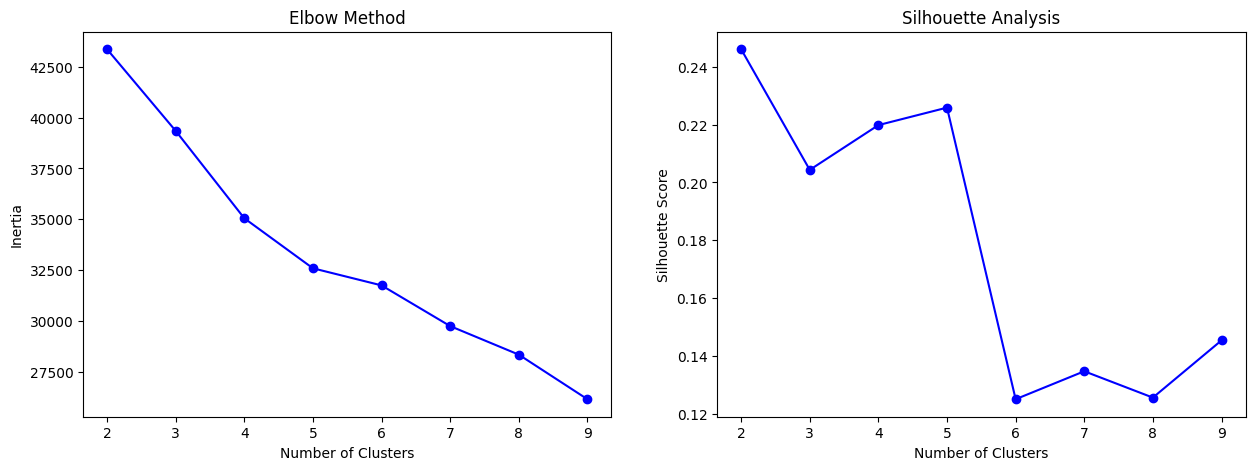

In [38]:
# Apply preprocessing
x_processed= preprocessor.fit_transform(dfa_clustering)

#Elbow Method and Silhouette Score
inertia=[]
silhouette_scores =[]
K_range=range(2,10)

for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    labels=kmeans.fit_predict(x_processed)
    inertia.append(kmeans.inertia_)
    
    if k >1:
        silhouette_scores.append(silhouette_score(x_processed,labels))

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


In [39]:
# final clustering based on the curves K=3

kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
clusters=kmeans.fit_predict(x_processed)

In [40]:
dfa['clusters']=clusters

In [41]:
# Analyze cluster characteristics
cluster_summary = dfa.groupby('clusters').mean(numeric_only=True)
print("Cluster Feature Means:")
print(cluster_summary.transpose())


Cluster Feature Means:
clusters                           0             1             2
TransactionAmount       2.700273e+02  1.926243e+02  7.240213e+02
CustomerAge             4.479046e+01  4.487531e+01  4.378404e+01
TransactionDuration     1.199149e+02  1.192357e+02  1.208709e+02
LoginAttempts           1.109959e+00  1.137157e+00  1.093897e+00
AccountBalance          5.425239e+03  5.102698e+03  4.806190e+03
TimeSinceLastTxn       -3.244611e+07 -4.439782e+07 -4.448093e+07
MerchantUseCount        1.035270e+00  1.059227e+00  1.046948e+00
TransactionHour         1.661411e+01  1.663404e+01  1.661033e+01
IsNightTransaction      0.000000e+00  0.000000e+00  0.000000e+00
AmountToBalanceRatio    1.566043e-01  1.153537e-01  5.678948e-01
TxnGapSeconds          -3.244611e+07 -4.439782e+07 -4.448093e+07
TxnsLast1H              1.004149e+00  1.007481e+00  1.004695e+00
DeviationFromAvgAmount -1.931919e+01 -1.008341e+02  4.015252e+02
IsLargeTxn              2.136929e-01  2.493766e-03  8.544601e-01
Is

In [42]:
# Visualize clusters using dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_processed)

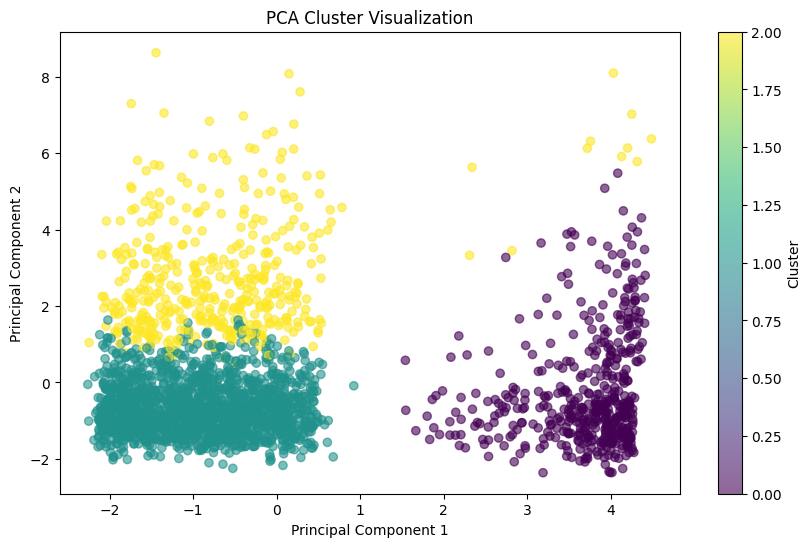

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('PCA Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

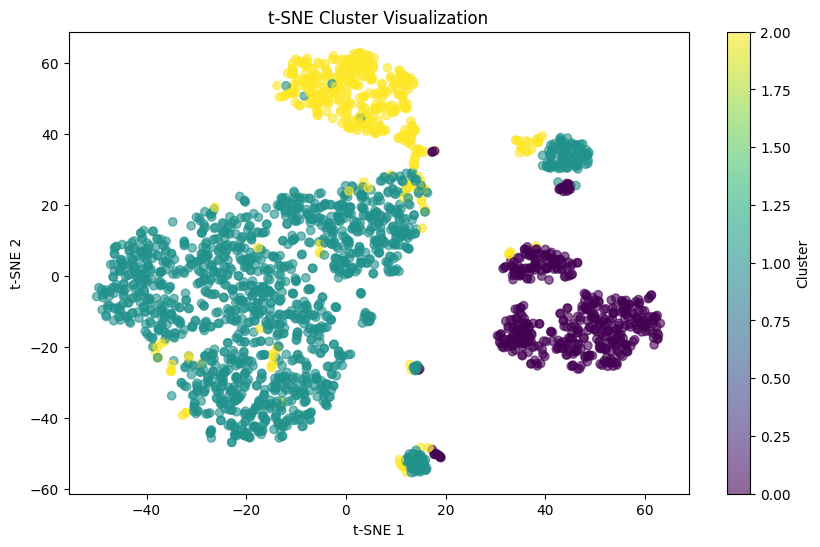


Potential Fraud Clusters:
          TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
clusters                                                                       
0                270.027324    44.790456           119.914938       1.109959   
1                192.624264    44.875312           119.235661       1.137157   
2                724.021315    43.784038           120.870892       1.093897   

          AccountBalance  TimeSinceLastTxn  MerchantUseCount  TransactionHour  \
clusters                                                                        
0            5425.238548     -3.244611e+07          1.035270        16.614108   
1            5102.697762     -4.439782e+07          1.059227        16.634040   
2            4806.189812     -4.448093e+07          1.046948        16.610329   

          IsNightTransaction  AmountToBalanceRatio  TxnGapSeconds  TxnsLast1H  \
clusters                                                                        
0   

In [44]:
# Advanced visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(x_processed)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('t-SNE Cluster Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

# Identify potential fraud clusters
# Focus on clusters with suspicious characteristics
suspicious_clusters = cluster_summary[
    (cluster_summary['IsSuspiciousLogin'] > 0.7) |
    (cluster_summary['IsNewDevice'] > 0.6) |
    (cluster_summary['IsLargeTxn'] > 0.5) |
    (cluster_summary['TxnsLast1H'] > cluster_summary['TxnsLast1H'].quantile(0.9))
]

print("\nPotential Fraud Clusters:")
print(suspicious_clusters)

# Save results with cluster labels
#df.to_csv('clustered_transactions.csv', index=False)

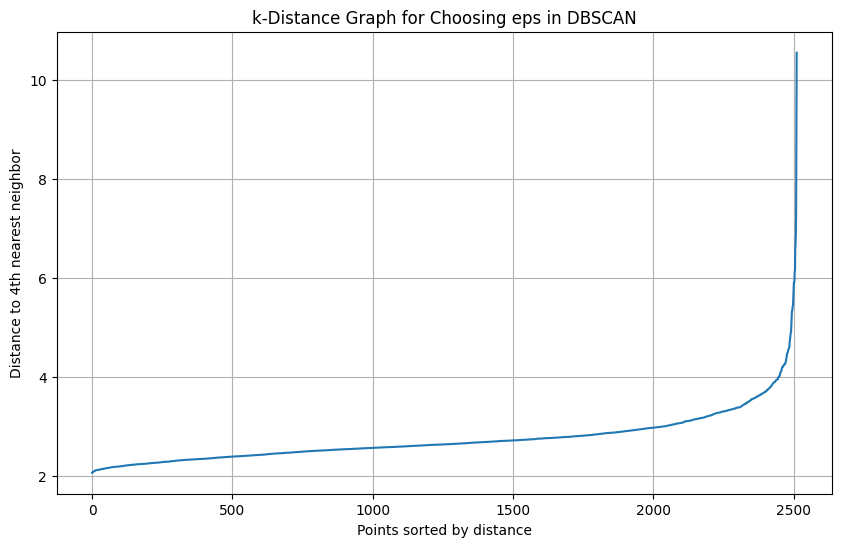

In [45]:
k = 4  # or whatever min_samples - 1 is
nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(x_processed)

# Get the distances to the k-th nearest neighbor
distances, indices = nn_fit.kneighbors(x_processed)
distances = np.sort(distances[:, k-1])  # get k-th nearest distance and sort

# Plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('k-Distance Graph for Choosing eps in DBSCAN')
plt.grid(True)
plt.show()


In [46]:
dbscan = DBSCAN(eps=6, min_samples=4)  # You may tune these
dbscan_labels = dbscan.fit_predict(x_processed)

In [47]:
dfa['DBSCAN_Cluster'] = dbscan_labels

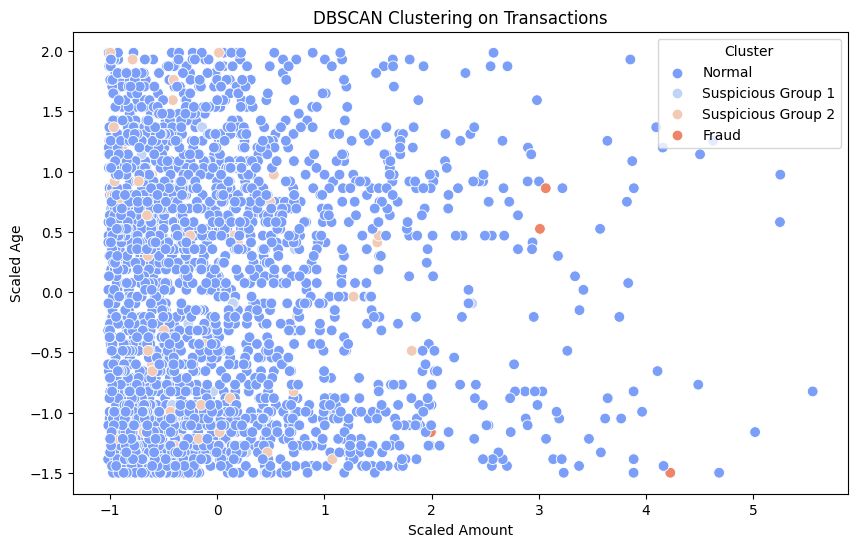

In [48]:
# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
dfa['DBSCAN_Cluster'] = dfa['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_processed[:, 0], y=x_processed[:, 1], hue=dfa['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

In [49]:
dfa.tail(10)

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,...,TxnGapSeconds,TxnsLast1H,DeviationFromAvgAmount,IsLargeTxn,IsNewDevice,IsNewMerchant,IsSuspiciousLogin,IsNewIP,clusters,DBSCAN_Cluster
TransactionDate,,,,,,,,,,,,,,,,,,,,,
2023-01-30 17:47:18,TX000460,AC00499,376.79,Debit,Milwaukee,D000242,143.212.47.226,M039,Branch,68,...,-55606886.0,1.0,45.177143,0,0,0,0,0,1,Normal
2023-02-20 18:48:52,TX001896,AC00499,49.67,Debit,Atlanta,D000560,184.4.253.143,M030,Online,21,...,-53788771.0,1.0,-281.942857,0,0,0,0,0,1,Normal
2023-05-15 16:40:24,TX000432,AC00499,461.52,Credit,Denver,D000670,59.127.135.25,M068,Branch,24,...,-46538909.0,1.0,129.907143,0,0,0,0,0,1,Normal
2023-06-08 16:28:29,TX001923,AC00499,242.17,Debit,Jacksonville,D000442,111.226.226.202,M032,ATM,60,...,-44466132.0,1.0,-89.442857,0,0,0,0,0,1,Normal
2023-11-15 18:57:38,TX000203,AC00499,313.82,Debit,Tucson,D000357,179.43.245.131,M097,Branch,59,...,-30633064.0,1.0,-17.792857,0,0,0,0,0,1,Normal
2023-11-27 16:14:25,TX001943,AC00499,837.29,Debit,Phoenix,D000189,217.233.219.196,M002,Branch,25,...,-29605967.0,1.0,505.677143,1,1,1,0,1,0,Normal
2023-01-30 16:37:53,TX002055,AC00500,156.86,Debit,Charlotte,D000168,11.167.243.171,M099,ATM,51,...,-55611154.0,1.0,-4.880000,0,0,0,0,0,1,Normal
2023-03-13 17:57:47,TX001716,AC00500,225.93,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,...,-51977452.0,1.0,64.190000,1,0,0,0,0,2,Normal
2023-07-06 16:47:00,TX002375,AC00500,129.62,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,...,-42045591.0,1.0,-32.120000,0,0,0,0,0,1,Normal


# HDBSCAN

## Why We Use HDBSCAN for Anomaly Detection
- HDBSCAN is a density-based clustering algorithm that automatically  
detects outliers.  
- Unlike KMeans, it does not require specifying the number of clusters.  
- This makes it ideal for fraud detection, where anomalies naturally form  
rare, low-density groups.

In [50]:
!pip install hdbscan 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.6 MB/s eta 0:00:00


In [51]:
import hdbscan

In [52]:
hdbscan=hdbscan.HDBSCAN(min_cluster_size=10,min_samples=5)
hdbscan_labels=hdbscan.fit_predict(x_processed)

In [53]:
dfa["HDBSCAN_Cluster"]=hdbscan_labels

# Visualize Clusters with PCA and t-SNE

## Purpose of PCA and t-SNE Visualization
- High-dimensional data is difficult to understand visually.  
- PCA reduces the data into principal components while keeping  
as much variance as possible.  
- t-SNE provides a non-linear projection that highlights local structure.  
- Together, these techniques help us visually inspect clusters  
and identify abnormal groups.

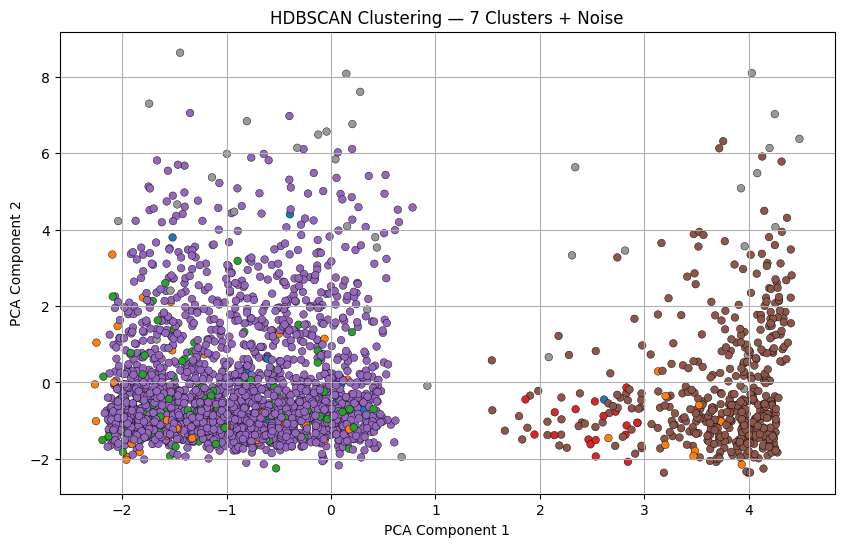

In [54]:
# Reduce the dimesionality to 2D

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_processed)


# plot 
# set up colors
unique_labels=np.unique(hdbscan_labels)
n_clusters=len(unique_labels[unique_labels]>=0) # ignoring noise 
palette=sns.color_palette("tab10", n_colors=n_clusters)


# 3. Assign colors (gray for noise)
colors = [
    (0.6, 0.6, 0.6) if label == -1 else palette[label % n_clusters]
    for label in hdbscan_labels
]
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors, s=30, edgecolor='k', linewidth=0.3)
plt.title(f"HDBSCAN Clustering — {n_clusters} Clusters + Noise")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



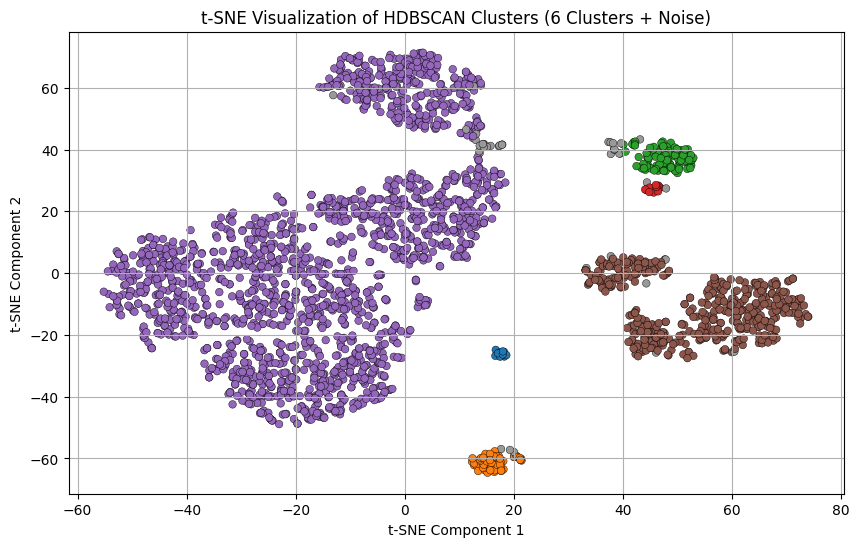

In [55]:
# 1. Run t-SNE on your scaled data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(x_processed)

# 2. Prepare colors for clusters
unique_labels = np.unique(hdbscan_labels)
n_clusters = len(unique_labels[unique_labels >= 0])  # ignoring noise
palette = sns.color_palette("tab10", n_colors=n_clusters)

# 3. Assign colors (gray for noise)
colors = [
    (0.6, 0.6, 0.6) if label == -1 else palette[label % n_clusters]
    for label in hdbscan_labels
]

# 4. Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, s=30, edgecolor='k', linewidth=0.3)
plt.title(f"t-SNE Visualization of HDBSCAN Clusters ({n_clusters} Clusters + Noise)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# Group by cluster and analyze patterns

- Clustering by itself is only half the story.  
- Once clusters are created, we inspect each one to understand what  
makes it unique.  
- Clusters with abnormal behavior patterns or very low populations  
are often indicators of potential fraud.

In [56]:
binary_columns=['IsNightTransaction', 'IsLargeTxn', 'IsNewDevice', 
               'IsNewMerchant', 'IsSuspiciousLogin', 'IsNewIP']
num_columns=[col for col in df.columns if col  not in binary_columns +['HDBSCAN_Cluster']]

num=dfa.groupby('HDBSCAN_Cluster')[num_columns].mean(numeric_only=True)
binary=dfa.groupby("HDBSCAN_Cluster")[binary_columns].sum()

cluster_profiles=pd.concat([num,binary],axis=1)
print(cluster_profiles)

                 TransactionAmount  CustomerAge  TransactionDuration  \
HDBSCAN_Cluster                                                        
-1                      896.160513    37.128205           127.461538   
 0                      297.163750    42.812500           120.562500   
 1                      231.268525    45.737705           134.262295   
 2                      215.793400    45.050000           113.190000   
 3                      126.273529    44.882353           124.882353   
 4                      296.397441    44.829415           119.770913   
 5                      284.236444    44.526667           117.668889   

                 LoginAttempts  AccountBalance  TimeSinceLastTxn  \
HDBSCAN_Cluster                                                    
-1                    1.538462     3399.472051     -3.895380e+07   
 0                    1.000000     4225.362500     -4.134718e+07   
 1                    4.491803     5545.637377     -4.423944e+07   
 2         

In [57]:
dfa['HDBSCAN_Cluster'].value_counts().sort_index()

HDBSCAN_Cluster
-1      39
 0      16
 1      61
 2     100
 3      17
 4    1829
 5     450
Name: count, dtype: int64

In [58]:
cs=pd.DataFrame(cluster_profiles)

In [59]:
cs.head(7)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTxn,MerchantUseCount,TransactionHour,AmountToBalanceRatio,TxnGapSeconds,TxnsLast1H,DeviationFromAvgAmount,IsNightTransaction,IsLargeTxn,IsNewDevice,IsNewMerchant,IsSuspiciousLogin,IsNewIP
HDBSCAN_Cluster,,,,,,,,,,,,,,,,,,
-1,896.160513,37.128205,127.461538,1.538462,3399.472051,-3.895380e+07,1.307692,16.692308,2.266386,-3.895380e+07,1.0,519.971384,0,31,16,13,3,17
0,297.163750,42.812500,120.562500,1.000000,4225.362500,-4.134718e+07,1.125000,16.625000,0.402983,-4.134718e+07,2.0,-11.163396,0,1,2,2,0,2
1,231.268525,45.737705,134.262295,4.491803,5545.637377,-4.423944e+07,1.016393,16.721311,0.132179,-4.423944e+07,1.0,-51.207242,0,7,9,9,61,9
2,215.793400,45.050000,113.190000,1.000000,5117.208500,-4.431607e+07,2.000000,16.610000,0.090967,-4.431607e+07,1.0,-56.412952,0,9,0,0,0,0
3,126.273529,44.882353,124.882353,1.000000,5624.801765,-3.122419e+07,2.000000,16.588235,0.047883,-3.122419e+07,1.0,-118.487902,0,0,17,0,0,17
4,296.397441,44.829415,119.770913,1.036632,5061.707037,-4.448935e+07,1.000000,16.628212,0.176802,-4.448935e+07,1.0,-2.748498,0,322,0,0,0,0
5,284.236444,44.526667,117.668889,1.026667,5429.900689,-3.242046e+07,1.000000,16.604444,0.147228,-3.242046e+07,1.0,-9.542301,0,101,448,450,0,445


## 9. Conclusion & Key Insights
- Identified clusters indicating potential fraudulent behavior.
- Visual analysis using PCA and t-SNE helped reveal separation patterns.
- Feature engineering improved anomaly detection quality.
- Next steps may include supervised classification with labeled fraud data.
